Test out dominant column in relation to eigenvalues

In [9]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [ ]:
# create random matrix
m = 100  # number of columns
n = 200  # number of rows
A = np.random.rand(n, m)
A_copy = A.copy()

# create random vector
b = np.random.rand(n)



(200,)

In [23]:
# angle between b and first eignevector of A
angles = []
multiple_of_b = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]
column_to_add_to = 3

for i in range(len(multiple_of_b)):
    added_column = b * multiple_of_b[i]
    A[:, column_to_add_to] = A_copy[:, column_to_add_to] + added_column
    
    _, v = np.linalg.eig(A @ A.T)

    angle = np.arccos(np.dot(b, v[:, 0]) / (np.linalg.norm(b) * np.linalg.norm(v[:, 0])))
    # in degrees

    angles.append(angle)

In [ ]:
np.pi/2

1.5707963267948966

d:\CSM\Mines_Research\Repositories\Coherence_Analyses\.venv\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
d:\CSM\Mines_Research\Repositories\Coherence_Analyses\.venv\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


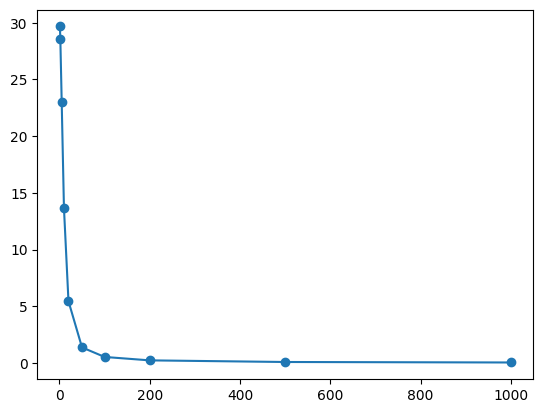

In [28]:
plt.plot(multiple_of_b, [abs(a - np.pi) * (180/np.pi) if a > np.pi/2 else a * (180/np.pi) for a in angles], marker='o')

In [45]:
angles_all = []

for i in range(len(multiple_of_b)):
    added_column = b * multiple_of_b[i]
    # tile the added column to match the shape of A
    added_column = np.tile(added_column, (m, 1)).T
    A = A_copy + added_column
    
    _, v = np.linalg.eig(A @ A.T)

    angle = np.arccos(np.dot(A[:,0], v[:, 0]) / (np.linalg.norm(A[:,0]) * np.linalg.norm(v[:, 0])))
    # in degrees

    angles_all.append(angle)

In [32]:
len(added_column)

200

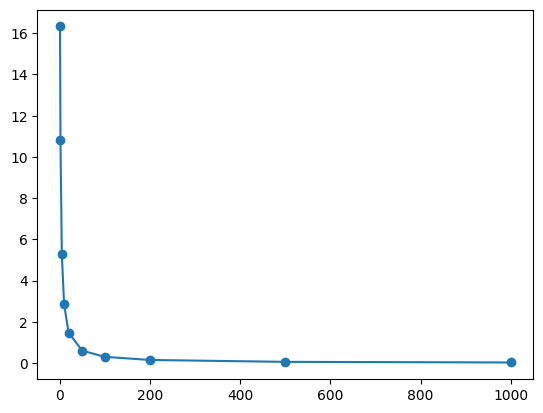

In [46]:
plt.plot(multiple_of_b, [abs(a - np.pi) * (180/np.pi) if a > np.pi/2 else a * (180/np.pi) for a in angles_all], marker='o')

In [21]:
n = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50, 100]
s = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25]
f = np.zeros((len(n), len(s)))
f2 = np.zeros((len(n), len(s)))
for i in range(len(n)):
    for j in range(len(s)):
        f2[i, j] = 1 / (n[i] * (1 + s[j]))
for i in range(len(n)):
    for j in range(len(s)):
        f[i, j] = (1 + n[i] * s[j]) / (n[i] * (1 + s[j]))

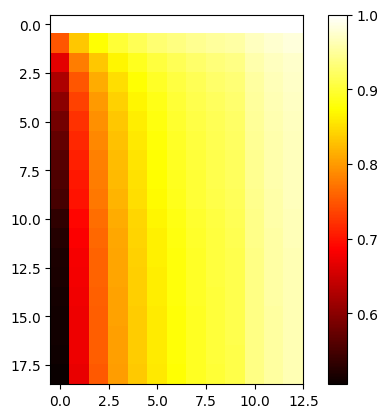

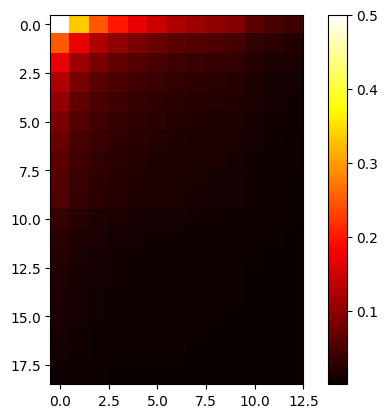

In [22]:
plt.figure()
plt.imshow(f, cmap='hot')
plt.colorbar()
plt.figure()
plt.imshow(f2, cmap='hot')
plt.colorbar()

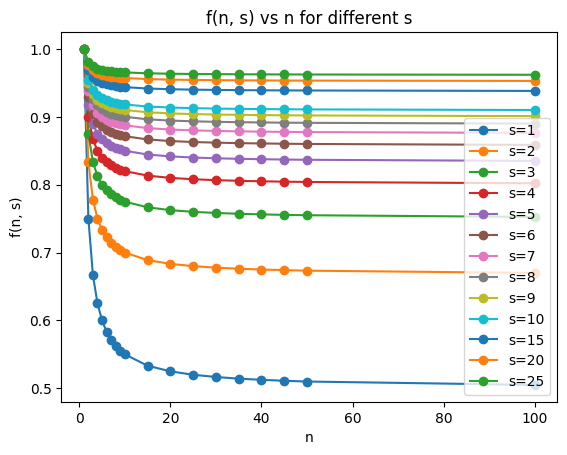

In [19]:
# plt.plot(n, f[:, 0], marker='o', label='s=1')
for i in range(len(s)):
    plt.plot(n, f[:, i], marker='o', label=f's={s[i]}')
plt.xlabel('n')
plt.ylabel('f(n, s)')
plt.title('f(n, s) vs n for different s')
plt.legend()

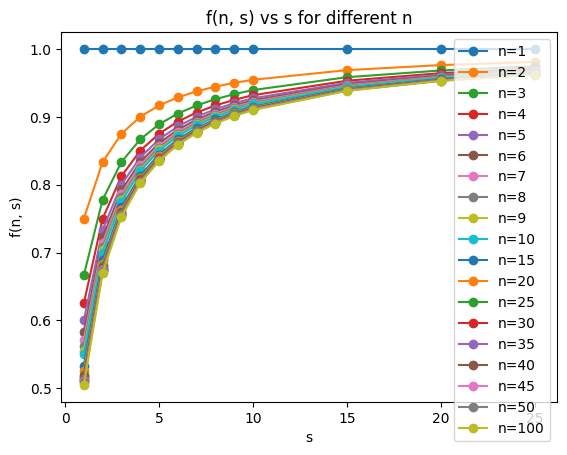

In [20]:
for i in range(len(n)):
    plt.plot(s, f[i], marker='o', label=f'n={n[i]}')
plt.xlabel('s')
plt.ylabel('f(n, s)')
plt.title('f(n, s) vs s for different n')
plt.legend()

Text(0.5, 1.0, 'f(betta) vs betta')

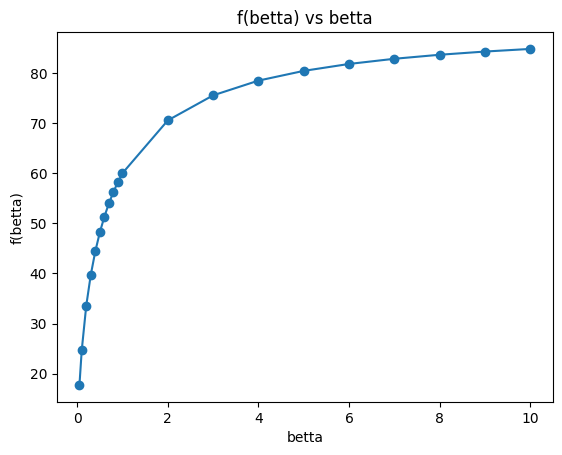

In [10]:
betta = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
f_betta = np.zeros(len(betta))
for i in range(len(betta)):
    f_betta[i] = math.degrees(np.arccos(1 / (1 + betta[i])))
plt.figure()
plt.plot(betta, f_betta, marker='o')
plt.xlabel('betta')
plt.ylabel('f(betta)')
plt.title('f(betta) vs betta')